# Mobile Price Classification
* Link to the dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## Context:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

`price_range`
> This is the target variable with value of:
* `0`(low cost)
* `1`(medium cost)
* `2`(high cost)
* `3`(very high cost).

### EDA

In [ ]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [ ]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (2000, 21)
Test shape: (1000, 21)


The `id` column is unnecessary in the test set

In [ ]:
test = test.drop(columns='id')

In [ ]:
test.shape

(1000, 20)

In [ ]:
# check for null values
train.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
test.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


So the dataset seems cleaned up already!

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We also dont have any categorical columns, therefore we can proceed to model building.

### Model prototyping


In [ ]:
# split the data

from sklearn.model_selection import train_test_split

X = train.drop(columns='price_range')
y = train['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((1600, 20), (1600,))

In [ ]:
y_train.value_counts()

,count
price_range,
0,400
1,400
3,400
2,400


So, we have `4` classes, thus we need multiclass classification.

In [ ]:
# we'll use the gradient boosting model
from xgboost import XGBClassifier

model = XGBClassifier(
                    n_estimators=100,
                    max_depth=10,
                    min_child_weight=2,
                    tree_method='hist',
                    objective='multi:softprob',
                    eval_metric='mlogloss',
                    n_jobs=-1,
                    random_state=1,
                    early_stopping_rounds=25
                )
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-mlogloss:1.01326
[1]	validation_0-mlogloss:0.80069
[2]	validation_0-mlogloss:0.65302
[3]	validation_0-mlogloss:0.56612
[4]	validation_0-mlogloss:0.49897
[5]	validation_0-mlogloss:0.44683
[6]	validation_0-mlogloss:0.40536
[7]	validation_0-mlogloss:0.37658
[8]	validation_0-mlogloss:0.35955
[9]	validation_0-mlogloss:0.34223
[10]	validation_0-mlogloss:0.32876
[11]	validation_0-mlogloss:0.31568
[12]	validation_0-mlogloss:0.30324
[13]	validation_0-mlogloss:0.29536
[14]	validation_0-mlogloss:0.28627
[15]	validation_0-mlogloss:0.28046
[16]	validation_0-mlogloss:0.27580
[17]	validation_0-mlogloss:0.27086
[18]	validation_0-mlogloss:0.26701
[19]	validation_0-mlogloss:0.26322
[20]	validation_0-mlogloss:0.26178
[21]	validation_0-mlogloss:0.26050
[22]	validation_0-mlogloss:0.25681
[23]	validation_0-mlogloss:0.25607
[24]	validation_0-mlogloss:0.25578
[25]	validation_0-mlogloss:0.25387
[26]	validation_0-mlogloss:0.25364
[27]	validation_0-mlogloss:0.25324
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=25,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
# check on validation set
model.score(X_val, y_val)

0.8925

Seems great! Let's look at the most important features

In [ ]:
print(dir(plot_importance))

['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__getstate__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__type_params__', '__wrapped__']


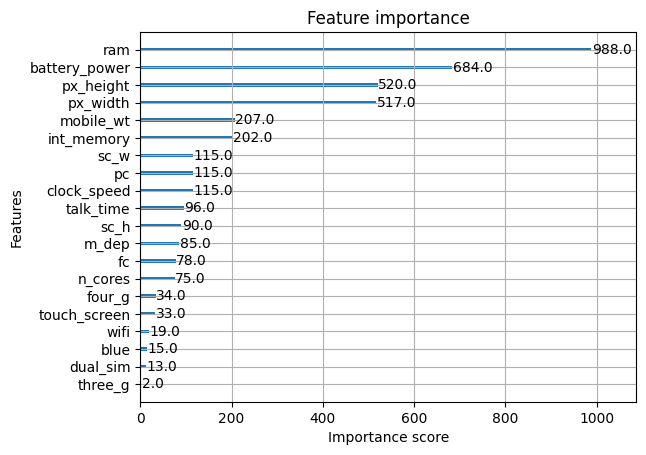

In [ ]:
from xgboost import plot_importance

plot_importance(model)
plt.show();

### Save the model

In [ ]:
model.save_model("mobile.json")